In [1]:
import argparse
import os
import json
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import uproot3
from matplotlib.offsetbox import AnchoredText
from util import make_dirs

Welcome to JupyROOT 6.12/07


/cvmfs/cms.cern.ch/slc7_amd64_gcc700/lcg/root/6.12.07-gnimlf5/lib/ROOT.py:318: DeprecationWarning: Python 2 has reached EOL. mplhep is in a deprecated mode. Please switch to Python 3.
  return _orig_ihook( name, *args, **kwds )


In [2]:
def plotTF_ratio_ggf(in_ratio, mask, region, args=None, zrange=None):
    fig, ax = plt.subplots()

    H = np.ma.masked_where(in_ratio * mask <= 0.01, in_ratio * mask)
    print(H)
    zmin, zmax = np.nanmin(H), np.nanmax(H)
    if zrange is None:
        # Scale clim to fit range up to a max of 0.6                                                          
        clim = np.max([.3, np.min([0.6, 1 - zmin, zmax - 1])])
    else:
        clim = zrange
    ptbins = np.array([450, 500, 550, 600, 675, 800, 1200])
    if 'vbf' in region:
        ptbins = np.array([450,1200])

    msdbins = np.linspace(40, 201, 24)
    hep.hist2dplot(H.T,
                   msdbins,
                   ptbins,
                   vmin=1 - clim,
                   vmax=1 + clim,
                   cmap='RdBu_r',
                   cbar=False)
    cax = hep.make_square_add_cbar(ax, pad=0.2, size=0.5)
    if abs(1 - zmin) > .3 and abs(1 - zmax) > .3:
        c_extend = 'both'
    elif abs(1 - zmin) > .3:
        c_extend = 'min'
    elif abs(1 - zmax) > .3:
        c_extend = 'max'
    else:
        c_extend = 'neither'
    cbar = fig.colorbar(ax.get_children()[0], cax=cax, extend=c_extend)

    ax.set_xticks(np.arange(40, 220, 20))
    ax.tick_params(axis='y', which='minor', left=False, right=False)
    ax.invert_yaxis()

    ax.set_title('{} QCD Ratio'.format(region), pad=15, fontsize=26)
    ax.set_xlabel(r'Jet $\mathrm{m_{SD}}$', ha='right', x=1)
    ax.set_ylabel(r'Jet $\mathrm{p_{T}}$', ha='right', y=1)
    cbar.set_label(r'(Pass QCD) / (Fail QCD * eff)', ha='right', y=1)
    return ax

In [3]:
year = "2017"
f = uproot3.open('fitDiagnosticsTest.root')
g = uproot3.open('signalregion.root')

[[1.         1.         1.         1.0000001  1.0000001  1.0000001
  1.         1.0000001  1.0000001  1.         1.         1.
  1.         1.         1.0000001  1.         1.         1.0000001
  1.0000001  1.         1.         1.         1.0000001 ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.0000001  1.         1.
  1.         1.0000001  1.         1.         1.         1.
  1.         1.0000001  1.0000001  1.         1.        ]
 [1.         1.0000001  1.0000001  1.         1.         1.
  1.         1.         1.         1.0000001  1.0000001  1.
  1.         1.0000001  1.0000001  1.         1.         1.
  1.         1.         1.0000001  1.         0.99999994]
 [1.0000001  1.0000001  1.         1.         1.0000001  1.
  1.0000001  1.         1.         1.         1.         1.
  1.         1.0000001  1.         1.0000001  1.         1.0000001
  1.0000001  1.         1.         1.0000001  1.        ]
 [1.         1.0000001  1. 

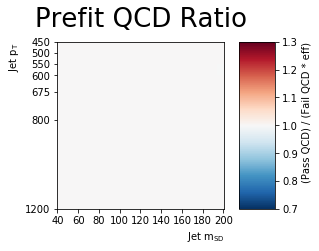

In [4]:
cat = 'ggf'
fail_qcd, pass_qcd = [], []
bins = []

nptbins = 6

for ipt in range(nptbins):
    fail_qcd.append(f['shapes_{}/ptbin{}{}{}{}/qcd;1'.format('prefit', ipt, cat, 'fail', year)].values)
    pass_qcd.append(f['shapes_{}/ptbin{}{}{}{}/qcd;1'.format('prefit', ipt, cat, 'pass', year)].values)

fail_qcd = np.array(fail_qcd)
pass_qcd = np.array(pass_qcd)

mask = ~np.isclose(pass_qcd, np.zeros_like(pass_qcd))
mask *= ~np.isclose(fail_qcd, np.zeros_like(fail_qcd))
q = np.sum(pass_qcd[mask]) / np.sum(fail_qcd[mask])
in_data_rat_prefit = (pass_qcd / (fail_qcd * q))

ax = plotTF_ratio_ggf(in_data_rat_prefit, mask, region="Prefit")
ax.figure.savefig('{}/{}{}_{}.png'.format('plots/', "TF_ratio_", 'ggf2d', year),
                  bbox_inches="tight", dpi=300)
ax.figure.savefig('{}/{}{}_{}.pdf'.format('plots/', "TF_ratio_", 'ggf2d', year),
                  bbox_inches="tight", transparent=True)

[[0.8785091  0.8610036  0.86011696 0.870464   0.8886347  0.91237235
  0.9401296  0.9708152  1.0036417  1.0380299  1.073547   1.1098646
  1.1467317  1.1839542  1.221381   1.2588935  1.2963988  1.3338231
  1.3350029  1.3350029  1.3350028  1.3350029  1.3350029 ]
 [0.90065604 0.8710812  0.85969496 0.8607497  0.8705867  0.8867695
  0.9076177  0.93193805 0.9588642  0.98775333 1.0181212  1.0495982
  1.0818979  1.1147972  1.1481204  1.1817272  1.2155069  1.2493696
  1.2832439  1.3170713  1.3350029  1.3350029  1.335003  ]
 [0.9278965  0.8873716  0.866459   0.8590836  0.8613595  0.8706881
  0.88526785 0.9038136  0.9253863  0.94928616 0.97498256 1.0020677
  1.0302236  1.0592006  1.0888004  1.1188639  1.1492634  1.1798949
  1.2106742  1.241532   1.2724117  1.303267   1.3340591 ]
 [0.96366465 0.9116867  0.88081014 0.8646165  0.8589839  0.8611433
  0.8691665  0.8816721  0.89764535 0.9163266  0.93713677 0.959628
  0.9834498  1.0083245  1.0340297  1.060387   1.087251   1.1145025
  1.1420444  1.1697961

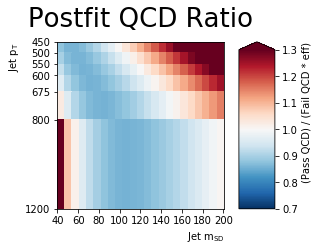

In [5]:
region = 'postfit'
cat = 'ggf'
fail_qcd, pass_qcd = [], []
bins = []

nptbins = 6

for ipt in range(nptbins):
    fail_qcd.append(f['shapes_{}/ptbin{}{}{}{}/qcd;1'.format('fit_s', ipt, cat, 'fail', year)].values)
    pass_qcd.append(f['shapes_{}/ptbin{}{}{}{}/qcd;1'.format('fit_s', ipt, cat, 'pass', year)].values)

fail_qcd = np.array(fail_qcd)
pass_qcd = np.array(pass_qcd)

mask = ~np.isclose(pass_qcd, np.zeros_like(pass_qcd))
mask *= ~np.isclose(fail_qcd, np.zeros_like(fail_qcd))
q = np.sum(pass_qcd[mask]) / np.sum(fail_qcd[mask])
in_data_rat_postfit = (pass_qcd / (fail_qcd * q))

ax = plotTF_ratio_ggf(in_data_rat_postfit, mask, region="Postfit")
ax.figure.savefig('{}/{}{}_{}.png'.format('plots/', "TF_ratio_", 'ggf2d', year),
                  bbox_inches="tight", dpi=300)
ax.figure.savefig('{}/{}{}_{}.pdf'.format('plots/', "TF_ratio_", 'ggf2d', year),
                  bbox_inches="tight", transparent=True)

In [6]:
def plotTF_ratio_onebin(in_ratio, h_ratio, mask, region):
    fig, ax = plt.subplots(figsize=(6,6))
    
    #print(in_ratio)
    
    color = 'blue'
    if 'res' in region:
        color = 'red'
    
    msdbins = np.linspace(40, 201, 24)
    fit = np.array([in_ratio.GetBinContent(i) for i in range(in_ratio.GetNbinsX())])
    fiterr = np.array([in_ratio.GetBinError(i) for i in range(in_ratio.GetNbinsX())])
    fitlow = fit - fiterr
    fithi = fit + fiterr
    

    plt.hist(msdbins[:-1],bins=msdbins,weights=fit,color=color,histtype='step')

    plt.hist(msdbins[:-1],bins=msdbins,weights=fithi,color=color,alpha=0.2,histtype='step',fill=True)
    plt.hist(msdbins[:-1],bins=msdbins,weights=fitlow,color='white',histtype='step',fill=True)
    
    plt.hist(msdbins[:-1],bins=msdbins,weights=fit,color=color,histtype='step')
    
    #hep.histplot(fit,yerr=fiterr,bins=msdbins,color=col)
    #hep.histplot(fit,yerr=fiterr,bins=msdbins,color=color)
    
    data = [h_ratio.GetBinContent(i) for i in range(h_ratio.GetNbinsX())]
    err = [h_ratio.GetBinError(i) for i in range(h_ratio.GetNbinsX())]
    
    hep.histplot(data,yerr=err,bins=msdbins,histtype='errorbar',color='black')

    ax.set_xticks(np.arange(40, 220, 20))
    #ax.tick_params(axis='y', which='minor', left=False, right=False)
    #ax.invert_yaxis()

    ax.set_title(region)
    ax.set_ylabel(r'Jet $\mathrm{p_{T}}$', ha='right', y=1)
    #ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)
    
    ax.figure.savefig('{}/{}{}_{}.png'.format('plots/', "TF_ratio_", region, year),
                  bbox_inches="tight", dpi=300)
    ax.figure.savefig('{}/{}{}_{}.pdf'.format('plots/', "TF_ratio_", region, year),
                  bbox_inches="tight", transparent=True)
    return ax

/uscms/home/jennetd/.local/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2484: UserWarning: Saw kwargs [u'ls', u'linestyle'] which are all aliases for u'linestyle'.  Kept value from u'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


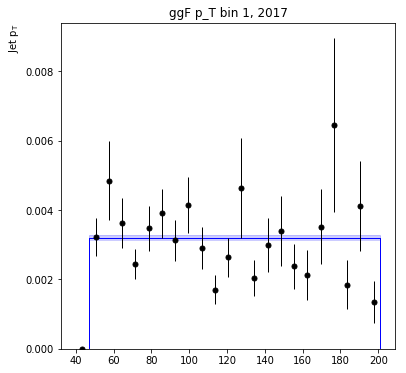

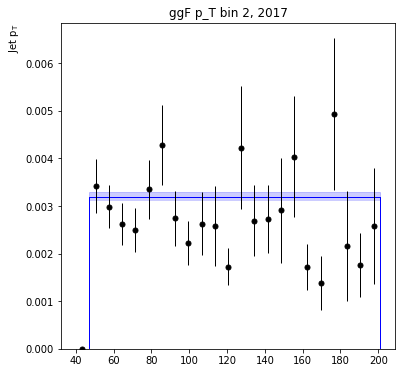

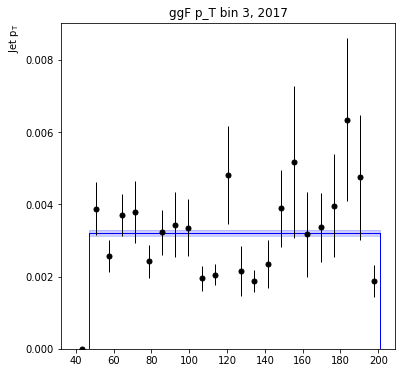

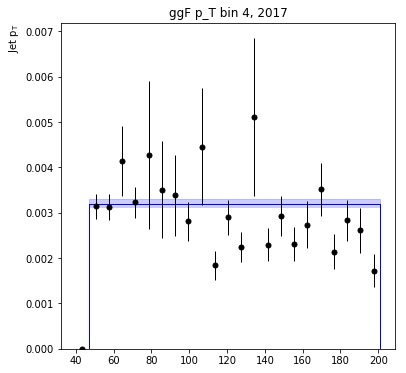

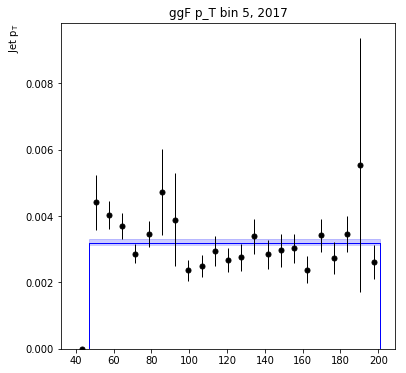

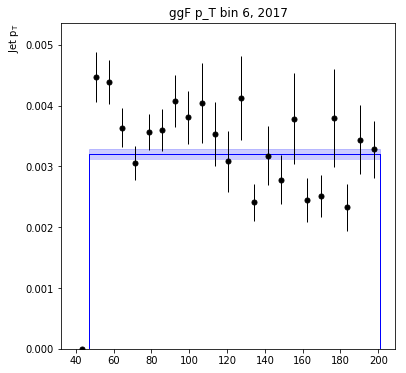

In [7]:
cat = 'ggf'

for ipt in range(6):

    fail_qcd, pass_qcd = [], []
    bins = []
    
    fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
    fail_qcd = fit.Get('shapes_{}/ptbin{}{}{}{}/qcd;1'.format('prefit', ipt, cat, 'fail', year))
    pass_qcd = fit.Get('shapes_{}/ptbin{}{}{}{}/qcd;1'.format('prefit', ipt, cat, 'pass', year))
    pass_qcd.Divide(fail_qcd)

    signalregion = r.TFile.Open('signalregion.root','READ')
    hfail = signalregion.Get('ggf_{}_pt{}_QCD_nominal;1'.format('fail',ipt+1))
    hpass = signalregion.Get('ggf_{}_pt{}_QCD_nominal;1'.format('pass',ipt+1))
    hpass.Divide(hfail)

    ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region=r'ggF p_T bin '+str(ipt+1)+', '+year)
    #ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)

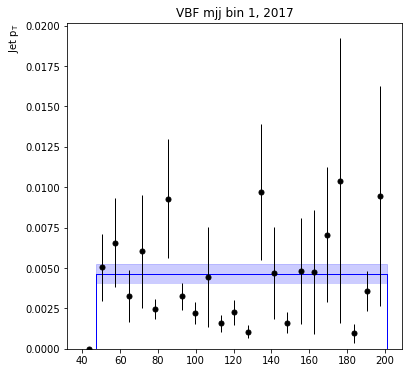

In [8]:
cat = 'vbflo'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj1_QCD_nominal;1'.format('fail'))
hpass = signalregion.Get('vbf_{}_mjj1_QCD_nominal;1'.format('pass'))
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region="VBF mjj bin 1, "+year)
#ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)

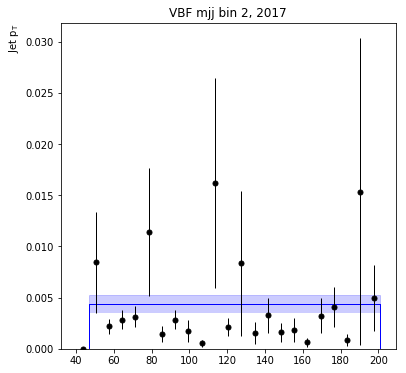

In [9]:
cat = 'vbfhi'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj2_QCD_nominal;1'.format('fail'))
hpass = signalregion.Get('vbf_{}_mjj2_QCD_nominal;1'.format('pass'))
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region="VBF mjj bin 2, "+year)
#ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)

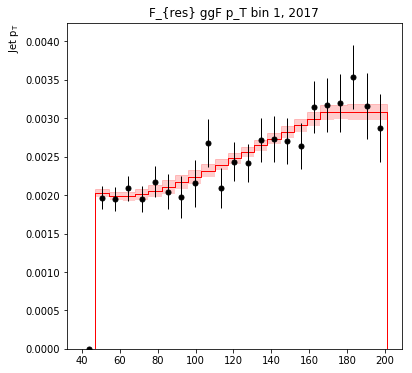

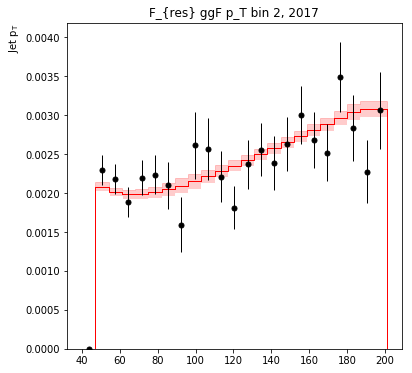

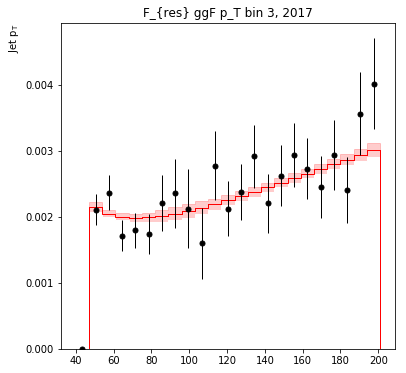

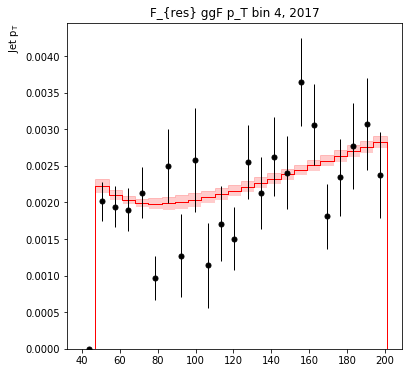

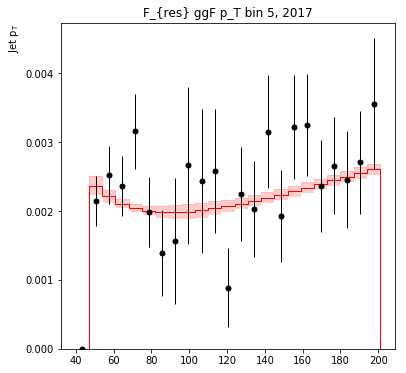

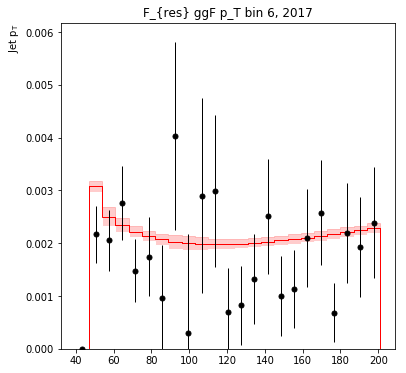

In [10]:
cat = 'ggf'

for ipt in range(6):

    fail_qcd, pass_qcd = [], []
    bins = []
    
    fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
    fail_qcd = fit.Get('shapes_{}/ptbin{}{}{}{}/qcd;1'.format('fit_s', ipt, cat, 'fail', year))
    pass_qcd = fit.Get('shapes_{}/ptbin{}{}{}{}/qcd;1'.format('fit_s', ipt, cat, 'pass', year))
    pass_qcd.Divide(fail_qcd)

    signalregion = r.TFile.Open('signalregion.root','READ')
    hfail = signalregion.Get('ggf_{}_pt{}_data_nominal;1'.format('fail',ipt+1))
    hpass = signalregion.Get('ggf_{}_pt{}_data_nominal;1'.format('pass',ipt+1))
    
    fitDiagnostics = r.TFile.Open('fitDiagnosticsTest.root','READ')
    backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']
    
    for b in backgrounds:
        try:
            bfail = fitDiagnostics.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
            bfail.Scale(-7)  
            hfail.Add(bfail)
        except:
            print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
        try:
            bpass = fitDiagnostics.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
            bpass.Scale(-7)
            hpass.Add(bpass)
        except: 
            print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))    
        
    hpass.Divide(hfail)

    ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region=r'F_{res} ggF p_T bin '+str(ipt+1)+', '+year)
    #ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

('Missing hist', 'shapes_fit_s/ptbin5vbflofail2017/Wjets')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2017/Wjets')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2017/Zjets')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2017/Zjets')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2017/Zjetsbb')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2017/Zjetsbb')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2017/EWKW')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2017/EWKW')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2017/EWKZ')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2017/EWKZ')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2017/EWKZbb')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2017/EWKZbb')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2017/ttbar')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2017/ttbar')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2017/singlet')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2017/singlet')
('Missing hist', 'shapes_fit_s/ptbin5vbflo

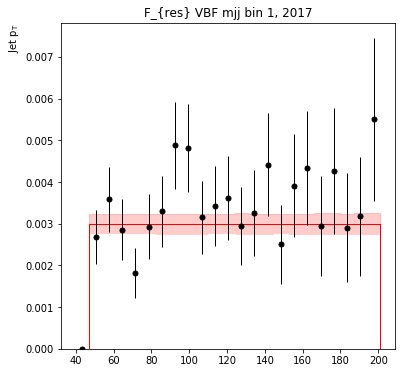

In [11]:
cat = 'vbflo'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj1_data_nominal;1'.format('fail'))
hpass = signalregion.Get('vbf_{}_mjj1_data_nominal;1'.format('pass'))

backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']

for b in backgrounds:
    try:
        bfail = fitDiagnostics.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
        bfail.Scale(-7)  
        hfail.Add(bfail)
    except:
        print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
    try:
        bpass = fitDiagnostics.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
        bpass.Scale(-7)
        hpass.Add(bpass)
    except: 
        print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))    
        
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region="F_{res} VBF mjj bin 1, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2017/Wjets')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2017/Wjets')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2017/Zjets')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2017/Zjets')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2017/Zjetsbb')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2017/Zjetsbb')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2017/EWKW')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2017/EWKW')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2017/EWKZ')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2017/EWKZ')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2017/EWKZbb')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2017/EWKZbb')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2017/ttbar')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2017/ttbar')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2017/singlet')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2017/singlet')
('Missing hist', 'shapes_fit_s/ptbin5vbfhi

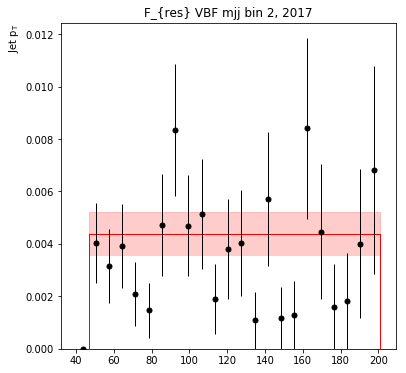

In [12]:
cat = 'vbfhi'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj2_data_nominal;1'.format('fail'))
hpass = signalregion.Get('vbf_{}_mjj2_data_nominal;1'.format('pass'))

backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']

for b in backgrounds:
    try:
        bfail = fitDiagnostics.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
        bfail.Scale(-7)  
        hfail.Add(bfail)
    except:
        print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
    try:
        bpass = fitDiagnostics.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
        bpass.Scale(-7)
        hpass.Add(bpass)
    except: 
        print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b)) 
     
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region="F_{res} VBF mjj bin 2, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)